# Método numérico para solucionar la distribucción de probabilidad de un electrón "atravesando" un pozo de cuadrado finito.

<center> <h2>Autor: Harold Yesid Laserna Diaz</h2> </center>

Un electrón es lanzado desde $-\infty$ e interactúa con un potencial $V(x)$ como se muestra a continuación:



$$    V(x)= 
\begin{cases}
    -V_{0},& \text{sí } |x| < a\\
    0,   &  \text{sí }   |x| > a.
\end{cases}
$$


![MarineGEO circle logo](pozo.png "MarineGEO logo")

Dado que el potencial es independiente del tiempo tenemos que la ecuación de Schrödinder es:

$$\frac{-\hbar^2}{2m}\frac{d^2\psi}{dx^2}+(V(x)-E)\psi=0,$$

siendo $m$ la masa del electrón, $\hbar$ siendo el cociente de la constante de Planck y 2 veces $\pi$ y $E$ la energía que puede tomar.

Dependiendo de la región tomada obtendremos diferentes soluciones a $\psi$ como se muestra a continuación:

$$    \psi(x)= 
\begin{cases}
    Fe^{-\kappa x},& \text{sí } x > a\\
    Dcos(lx),   &  \text{sí }  0 < x < a \\
    \psi(-x), & \text{sí } x < 0,\\
\end{cases}
$$

Con $l$ y $\kappa$ como:
$$l= \frac{\sqrt{2m(E+V_{0})}}{\hbar}$$
$$\kappa = \frac{\sqrt{-2mE}}{\hbar}$$

Tenemos que para una transmisión perfecta T = 1 obtenemos que la energía $E_{n}$ es:

$$E_{n}= \frac{n^2\pi^2\hbar^2}{2m(2a)^2}-V_{0}$$
Ocurre unicamente cuando estamos en un pozo cuadrado infinito o aproximadamente en pozos con $V_{0}$ grandes se puede tomar la anterior ecuación como una aproximación. 

En este caso nos interesa solucionar la anterior ecuación de Schrödinger mediante metodos numéricos.

# modelo por métodos numéricos

Tenemos en cuenta que la solución de $\psi$ independientemente del potencial $V(t,x)$ tiene que ser normalizable. Esto quiere decir que TODAS las funciones $\psi$ cumplen con la siguiente condición:

$$\lim_{x \to -\infty}\psi(x)=0 \\ y \\ \lim_{x \to \infty}\psi(x)=0.$$

Es decir que si tomamos una posición $x$ lo suficientemente lejano al interés del evento podemos usar las anteriores condiciones es decir $\lim_{x \to -a}\psi(x)=0 \ y \ \lim_{x \to a}\psi(x)=0$.

La anterior es importante dado que a la hora de simular nuestro sistema mediante metodos numéricos, tenemos que escoger una posición lo suficientemente lejana al evento, ya que es en el único lugar que conocemos la función $\psi$ y en los demás lugares la deseamos conocer mediante la simulación.

También es importante adimensionar la ecuación de Schrödinger en este caso, ya que algunos métodos tienen unos límites de convergencia del metodo, es decir que si escogemos una posición demasiado grande, nuestro método númerico no va converger a una solución deseable. 
Para adimensionar la ecuación de Schrödinger usamos el siguiente convenio:
$$y=\frac{x}{L},$$
siendo $L$ una constante a escoger, con las mismas unidades que $x$.

Teniendo en cuenta la regla de la cadena para la primera derivada obtenemos que:

$$\frac{d\psi}{dx}=\frac{d\psi}{dy}\frac{dy}{dx}$$
$$\frac{d\psi}{dx}=\frac{d\psi}{dy}\frac{1}{L}$$

aplicando una segunda derivada obtenemos que:
$$\frac{d^2\psi}{dx^2}=\frac{d}{dx}\left(\frac{d\psi}{dy}\right)\frac{1}{L}$$
Por teorema de Schwarz lo anterior se convierte en:
$$\frac{d^2\psi}{dx^2}=\frac{d}{dy}\left(\frac{d\psi}{dx}\right)\frac{1}{L}$$
siendo la solución a la primera derivada anterior tal que:
$$\frac{d^2\psi}{dx^2}=\frac{d}{dy}\left(\frac{d\psi}{dy}\frac{1}{L}\right)\frac{1}{L}$$
con lo cual obtenemos que:
$$\frac{d^2\psi}{dx^2}=\frac{d^2\psi}{dy^2}\frac{1}{L^2}$$
remplazando en la ecuación de Schrödinger independiente del tiempo:
$$\frac{-\hbar^2}{2m}\frac{d^2\psi}{dy^2}\frac{1}{L^2}+(V(x)-E)\psi=0,$$
y organizando términos tenemos que:
$$\frac{d^2\psi}{dy^2}+\frac{2mL^2}{\hbar^2}(E-V(y))\psi=0,$$
Esta anterior ecuación diferencial de segundo orden puede ser posible de solucionar con métodos de un paso como lo es Runge Kutta, Euler, etc, el unico problema es tantear la ecuación con varios valores de $E$ hasta encontrar una solución con sentido, debido a que $E$ no es continuo encontramos ese problema. Aún asi, si es posible solucionar con metodos de un paso o multipaso.

El objetivo para poder aplicar un método numérico más eficiente es convertir la anterior ecuación diferencial en una ecuación lineal sin derivadas. Con lo cual necesitamos transformar la segunda derivada de la función con respecto a $y$ en algo que no sea derivada.

Para esto, primero usamos la expansión de Taylor centrada en $x$ para $f(x+h)$ y $f(x-h)$ siendo $h$ un incremento arbitrario (que definiremos con más detalle más adelante) escribiendo la expansión de Taylor únicamente a terce orden obtenemos que:

$$f(x+h)\approx f(x)+ \frac{df(x)}{dx}h + \frac{d^2f(x)}{dx^2}\frac{h^2}{2} +\frac{d^3f(x)}{dx^3}\frac{h^3}{6}$$

$$f(x-h)\approx f(x)- \frac{df(x)}{dx}h + \frac{d^2f(x)}{dx^2}\frac{h^2}{2} - \frac{d^3f(x)}{dx^3}\frac{h^3}{6},$$

sumando $f(x+h)$ y $f(x-h)$
tenemos que:

$$f(x+h)+f(x+h) \approx 2f(x)+\frac{d^2f(x)}{dx^2}h^2$$

despejando la segunda derivada tenemos que:

$$\frac{d^2f(x)}{dx^2} \approx \frac{f(x+h)+f(x-h)-2f(x)}{h^2}$$

Como observamos de la anterior ecuación, mediante aproximación por expansión de Taylor, es posible convertir derivadas en sumas y restas de la función original dado un incremento $h$ escogido. Con lo anterior aún no es posible pasar a programar debido a que en la ecuación anterior, $x$ sigue siendo continuo. Para esto necesitamos discretizar $x$ de la siguente forma:

![discretizar](discretizar.jpg "MarineGEO logo")

Como se muestra en la imagen anterior para poder discretizar cogemos la función continua y solo seleccionamos puntos que estén separados a una distancia $h$ entre sí. para este caso discretizamos desde un punto $x_{o}$ hasta un punto $x_{n}$, siendo $n+1$ la cantidad total de puntos $x_{i}$
en este caso $x_{o}$ y $x_{n}$ la frontera de puntos a usar.
Dado que podemos definir las fronteras y podemos definir la cantidad de puntos totales a usar podemos determinar la distancia $h$ punto a punto de la siguiente forma:

$$h=\frac{x_{n}-x_{0}}{n},$$

lo anterior exige que $x_{n}>x_{0}$
definido el incremento $h$ es posible definir $x_{1}$, $x_{2}$, $x_{3}$ de la siguiente forma

$$x_{1}=x_{0}+h$$
$$x_{2}=x_{1}+h$$
$$x_{3}=x_{2}+h,$$

es decir que para definir cualquier $x_{i+1}$ es necesario tener el valor de $x_{i}$ es decir, que en general:
$$x_{i+1}=x_{i}+h$$
desde esta perspectiva de discretización, ahora el valor obtenido de la derivada anterior puede ser escrita como:
$$\frac{d^2f(x_{i})}{dx_{i}^2} \approx \frac{f(x_{i}+h)+f(x_{i}-h)-2f(x_{i})}{h^2}$$

teniendo en cuenta el incremento $h$, podemos reorganizar lo anterior como:

$$\frac{d^2f(x_{i})}{dx_{i}^2} \approx \frac{f(x_{i+1})+f(x_{i-1})-2f(x_{i})}{h^2}$$

aclarando que $x_{i-1}=x_i-h$,teniendo en cuenta la "transformación" de la segunda derivada y la discretización de $x$ ahora definamos la segunda derivada con respecto a la posición en este caso para la función $\psi$ y asumiendo la aproximación como una igualdad:

$$\frac{d^2\psi(x_{i})}{dx_{i}^2} = \frac{\psi(x_{i+1})+\psi(x_{i-1})-2\psi(x_{i})}{h^2}$$

Escribiendo la ecuación de Schrödinger con la variable $y$ discretizada, en este caso usamos $y_{i}$ tal que:

$$\frac{d^2\psi(y_{i})}{dy_{i}^2}+\frac{2mL^2}{\hbar^2}(E-V(y_{i}))\psi(y_{i})=0,$$
ahora, reemplazando la derivada con la aproximación anterior se tiene que:

$$\frac{\psi(y_{i+1})+\psi(y_{i-1})-2\psi(y_{i})}{h^2}+\frac{2mL^2}{\hbar^2}(E-V(y_{i}))\psi(y_{i})=0,$$

Reorganizando terminos tenemos la siguiente ecuación (el objetivo de la reorganización es compararlo mas adelante para construir una matriz):

$$-\frac{1}{2}\frac{\psi(y_{i-1})}{h^2} + \left( \frac{1}{h^2} + \frac{mL^2}{\hbar^2}V(y_{i})\right)\psi(y_{i}) -\frac{1}{2}\frac{\psi(y_{i+1})}{h^2}=\frac{mL^2E}{\hbar^2}\psi(y_{i})$$

Para tener una solución del sistema necesitamos los valores de frontera de $\psi$ es decir $\psi(y_{0})$ y $\psi(y_{n})$, en este caso $y_{0}$ y $y_{n}$ son puntos lejanos al evento de interes es decir que:
$$\psi(y_{n}) = \psi(y_{0}) = 0$$

construyendo las ecuaciones para $y_{1}$, $y_{2}$ y $y_{n-1}$
tenemos lo siguiente:

$x_{1}:$

$$-\frac{1}{2}\frac{\psi(y_{0})}{h^2} + \left( \frac{1}{h^2} + \frac{mL^2}{\hbar^2}V(y_{1})\right)\psi(y_{1}) -\frac{1}{2}\frac{\psi(y_{2})}{h^2}=\frac{mL^2E}{\hbar^2}\psi(y_{1})$$

$x_{2}:$

$$-\frac{1}{2}\frac{\psi(y_{1})}{h^2} + \left( \frac{1}{h^2} + \frac{mL^2}{\hbar^2}V(y_{2})\right)\psi(y_{2}) -\frac{1}{2}\frac{\psi(y_{3})}{h^2}=\frac{mL^2E}{\hbar^2}\psi(y_{2})$$

$x_{n-1}:$

$$-\frac{1}{2}\frac{\psi(y_{n})}{h^2} + \left( \frac{1}{h^2} + \frac{mL^2}{\hbar^2}V(y_{n-1})\right)\psi(y_{n-1}) -\frac{1}{2}\frac{\psi(y_{n-2})}{h^2}=\frac{mL^2E}{\hbar^2}\psi(y_{n})$$

teniendo en cuenta que $\psi(y_{n})$ y $\psi(y_{0})$ son 0 y teniendo encuenta los demás $y_{i}$ es posible construir la siguiente ecuación lineal matricialmente:

$$
\boldsymbol{A}\begin{bmatrix}
\psi(y_{1}) \\
\psi(y_{2}) \\
\vdots \\
\psi(y_{n-2}) \\
\psi(y_{n-1})
\end{bmatrix}
=\frac{mL^2E}{\hbar^2}\begin{bmatrix}
\psi(y_{1}) \\
\psi(y_{2}) \\
\vdots \\
\psi(y_{n-2}) \\
\psi(y_{n-1})
\end{bmatrix}
$$
siendo $\boldsymbol{A}$ una matriz de $n-1$x$n-1$ definida de la siguiente forma:

$$\boldsymbol{A} = \begin{bmatrix}
\frac{1}{h^2} + \frac{mL^2}{\hbar^2}V(y_{1}) & - \frac{1}{2h^2} & 0 & \ldots & 0 & 0 \\
- \frac{1}{2h^2} & \frac{1}{h^2} + \frac{mL^2}{\hbar^2}V(y_{2}) & - \frac{1}{2h^2} & \ldots & 0 & 0\\
\vdots & \vdots & \vdots & \ddots &\vdots & \vdots \\
0 & 0 & 0 & \ldots & - \frac{1}{2h^2} & \frac{1}{2h^2} + \frac{mL^2}{\hbar^2}V(y_{n-1})
\end{bmatrix}$$

De esto podemos observar que lo anterior es un poblema de autovalores y autovectores siendo el autovector, el vector con las componentes $\psi(y_i)$ y los autovalores $\frac{mL^2E}{\hbar^2}$

Esta matriz es una matriz tridiagonal que puede ser definida de forma simple de la siguiente forma 

$$A_{i,i} = \frac{1}{h^2} + \frac{mL^2}{\hbar^2}V(y_{i})$$
$$A_{i,i+1} = A_{i,i-1} = -\frac{1}{h^2}$$
$$A_{i,j} = 0, \ para \ j \neq i+1 \ y \ \ j \neq i-1 $$

In [523]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal 

In [793]:
def potential(x, a, V_o):
    if x >= 0.25 and x <= 0.75:
        return -V_o
    else:
        return 0


In [796]:
m = 0.51e6 #eV/c²
V_o = 83  #eV
h_barra = 6.582119 #eV.s
a = 2e-15 #m

In [771]:
alpha=m*((2*a)**2)/(h_barra**2)

In [689]:
x_o = -10*a 
x_n = 10*a

In [752]:
n = 1000
h = 1/n

In [753]:
y = np.linspace(0,1,n)

In [754]:
x = np.linspace(0,8,n)
L = 8e-15

In [755]:
mean = x.mean()
std = x.std()

In [756]:
a_normalized = 1/2

In [695]:
print(L)

8e-15


In [696]:
alpha=m*(L**2)/(h_barra**2)

In [797]:
alpha  = 4000000

In [778]:
alpha=500

In [798]:
trace= []
for i in range(len(y)):
    trace.append((1/(h**2)) + alpha*potential(y[i],a_normalized, V_o))
trace = trace[1:-1]

In [799]:
upperdiagonal = (-1/(h**2))*np.ones(len(trace)-1)

In [800]:
Energy , state = eigh_tridiagonal(trace, upperdiagonal)

In [826]:
h  = 6.582119e-16
pi = 3.1416
a = 4e-15
m = 0.51099e6
n = 1
E = (n**2)*(pi**2)*(h**2)/(2*m*(a**2)) -83
E

-82.9999997385005

Text(0, 0.5, 'Distribución de probabilidad')

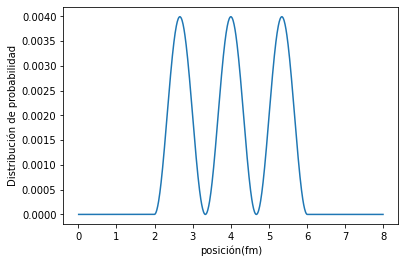

In [803]:
#plt.plot(x[1:-1],state.T[0]**2)
#plt.plot(x[1:-1],state.T[1]**2)
plt.plot(x[1:-1],state.T[2]**2)
plt.xlabel("posición(fm)")
plt.ylabel("Distribución de probabilidad")

Text(0, 0.5, 'Energía(Ev)')

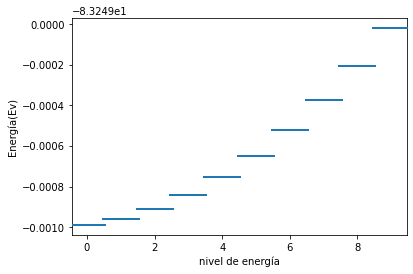

In [804]:
plt.scatter(np.arange(0,10,1), Energy[0:10]/alpha,
s=1444, marker="_", linewidth=2, zorder=3)
plt.xlabel("nivel de energía")
plt.ylabel("Energía(Ev)")

In [805]:
Energy

array([-3.32999961e+08, -3.32999843e+08, -3.32999646e+08, -3.32999371e+08,
       -3.32999017e+08, -3.32998585e+08, -3.32998074e+08, -3.32997484e+08,
       -3.32996816e+08, -3.32996069e+08, -3.32995244e+08, -3.32994341e+08,
       -3.32993359e+08, -3.32992298e+08, -3.32991160e+08, -3.32989943e+08,
       -3.32988647e+08, -3.32987274e+08, -3.32985822e+08, -3.32984293e+08,
       -3.32982685e+08, -3.32980999e+08, -3.32979236e+08, -3.32977394e+08,
       -3.32975475e+08, -3.32973478e+08, -3.32971404e+08, -3.32969252e+08,
       -3.32967023e+08, -3.32964716e+08, -3.32962332e+08, -3.32959871e+08,
       -3.32957333e+08, -3.32954718e+08, -3.32952026e+08, -3.32949257e+08,
       -3.32946412e+08, -3.32943490e+08, -3.32940492e+08, -3.32937417e+08,
       -3.32934266e+08, -3.32931039e+08, -3.32927737e+08, -3.32924358e+08,
       -3.32920904e+08, -3.32917374e+08, -3.32913769e+08, -3.32910088e+08,
       -3.32906333e+08, -3.32902502e+08, -3.32898597e+08, -3.32894617e+08,
       -3.32890563e+08, -